<a href="https://colab.research.google.com/github/Sp-supriya/HCDS-Projects/blob/main/Project_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting System - Project Demand of Products at a Retail Outlet Based on Historical Data**

In [ ]:
!pip install pandas matplotlib seaborn statsmodels plotly


In [ ]:
import pandas as pd
import numpy as np

# Generate a date range for the dataset
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

# Simulate sales data for a product
np.random.seed(0)
sales_data = np.random.poisson(lam=20, size=len(dates))  # Simulating daily sales data

# Create a DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Product_ID': 1,
    'Product_Name': 'Product A',
    'Sales': sales_data
})

# Save the DataFrame as CSV
df.to_csv('/content/retail_sales_data.csv', index=False)

# Preview the data
df.head()

# Load the dataset
df = pd.read_csv('/content/retail_sales_data.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows
df.head()


,Date,Product_ID,Product_Name,Sales
0,2022-01-01,1,Product A,21
1,2022-01-02,1,Product A,21
2,2022-01-03,1,Product A,19
3,2022-01-04,1,Product A,19
4,2022-01-05,1,Product A,32


In [ ]:
df.set_index('Date', inplace=True)


In [ ]:
monthly_sales = df.resample('M').sum()
monthly_sales.head()


<ipython-input-4-f14c650fd50b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()


,Product_ID,Product_Name,Sales
Date,,,
2022-01-31,31,Product AProduct AProduct AProduct AProduct AP...,620
2022-02-28,28,Product AProduct AProduct AProduct AProduct AP...,579
2022-03-31,31,Product AProduct AProduct AProduct AProduct AP...,609
2022-04-30,30,Product AProduct AProduct AProduct AProduct AP...,615
2022-05-31,31,Product AProduct AProduct AProduct AProduct AP...,620


In [ ]:
# Split the data into training and test sets
train = monthly_sales[:int(0.8 * len(monthly_sales))]
test = monthly_sales[int(0.8 * len(monthly_sales)):]

# Show the split
train.head(), test.head()


(            Product_ID                                       Product_Name  \
 Date                                                                        
 2022-01-31          31  Product AProduct AProduct AProduct AProduct AP...   
 2022-02-28          28  Product AProduct AProduct AProduct AProduct AP...   
 2022-03-31          31  Product AProduct AProduct AProduct AProduct AP...   
 2022-04-30          30  Product AProduct AProduct AProduct AProduct AP...   
 2022-05-31          31  Product AProduct AProduct AProduct AProduct AP...   
 
             Sales  
 Date               
 2022-01-31    620  
 2022-02-28    579  
 2022-03-31    609  
 2022-04-30    615  
 2022-05-31    620  ,
             Product_ID                                       Product_Name  \
 Date                                                                        
 2022-10-31          31  Product AProduct AProduct AProduct AProduct AP...   
 2022-11-30          30  Product AProduct AProduct AProduct AProduct A

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(train['Sales'], order=(5, 1, 0))  # (p, d, q) = (5, 1, 0) is a common starting point
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                    9
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -29.753
Date:                Tue, 06 May 2025   AIC                             71.506
Time:                        12:44:09   BIC                             71.983
Sample:                    01-31-2022   HQIC                            68.291
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7137      0.426     -1.673      0.094      -1.550       0.122
ar.L2         -1.2275      0.757     -1.622      0.105      -2.710       0.255
ar.L3         -1.1930      0.672     -1.775      0.0

In [ ]:
# Make predictions on the test set
forecast = model_fit.forecast(steps=len(test))
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])

# Combine the actual and forecasted values
comparison_df = pd.concat([test['Sales'], forecast_df], axis=1)
comparison_df.columns = ['Actual', 'Forecast']
comparison_df.head()


,Actual,Forecast
Date,,
2022-10-31,599,NaN
2022-11-30,602,NaN
2022-12-31,666,NaN


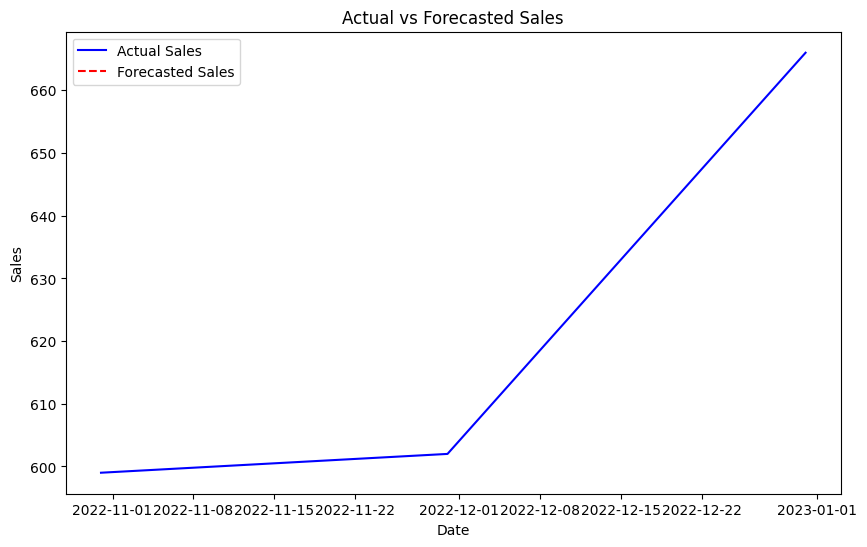

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs. forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual Sales', color='blue')
plt.plot(comparison_df['Forecast'], label='Forecasted Sales', color='red', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# Save the forecasted data to a CSV file
forecast_df.to_csv('/content/forecasted_sales.csv')

# Download the file
from google.colab import files
files.download('/content/forecasted_sales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Make future predictions (e.g., next 3 months)
future_forecast = model_fit.forecast(steps=3)
future_forecast_df = pd.DataFrame(future_forecast, index=pd.date_range('2023-01-01', periods=3, freq='M'), columns=['Forecast'])

# Show future predictions
future_forecast_df


<ipython-input-10-f0cd77f301c4>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_forecast_df = pd.DataFrame(future_forecast, index=pd.date_range('2023-01-01', periods=3, freq='M'), columns=['Forecast'])


,Forecast
2023-01-31,NaN
2023-02-28,NaN
2023-03-31,NaN
